### Customer Churn Prediction

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Load dataset
df = pd.read_csv("C:/Users/harik/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [12]:
# Drop customerID column (not useful)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric, handle missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode target label
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 78.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



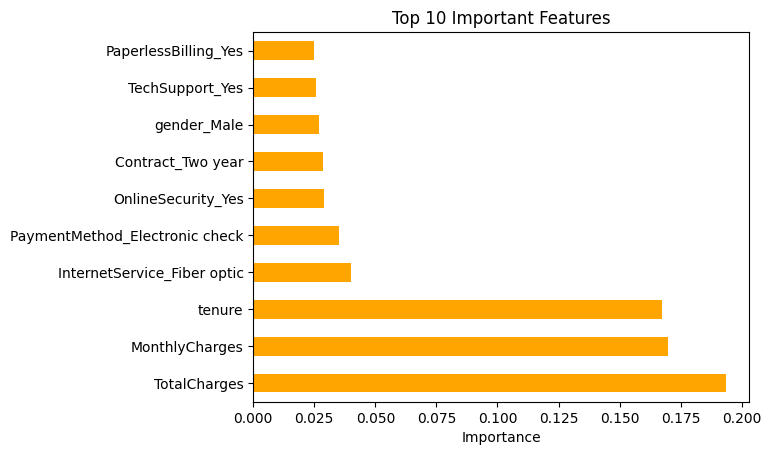

In [13]:
# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.show()

C:\Users\harik\AppData\Local\Temp\ipykernel_17960\532428682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


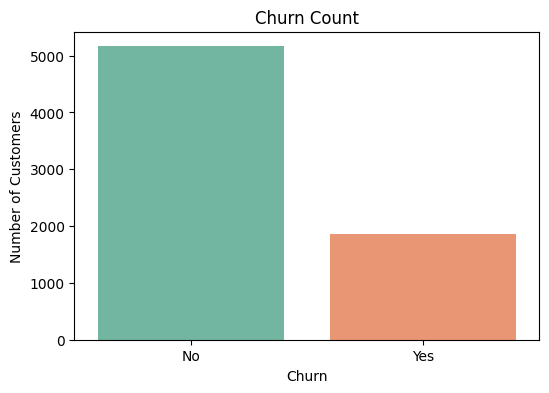

In [14]:
# Visualize Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

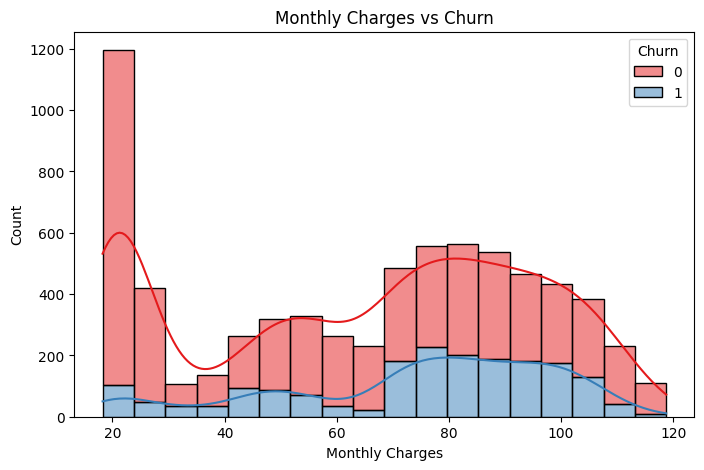

In [15]:
# Monthly Charges Distribution by Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, multiple="stack", palette='Set1')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

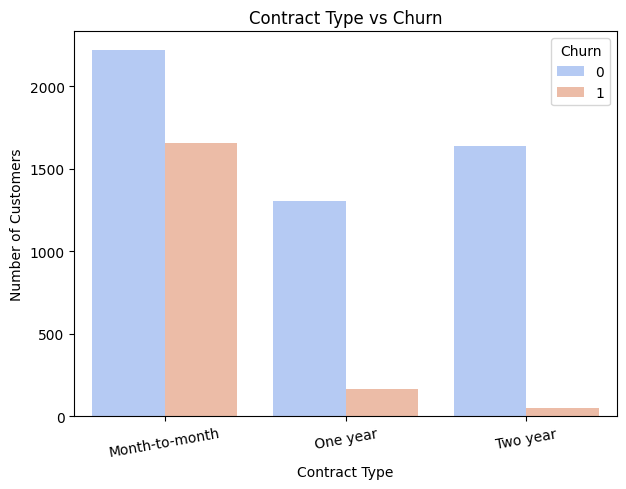

In [16]:
# Contract Type vs Churn
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Contract Type vs Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.xticks(rotation=10)
plt.show()

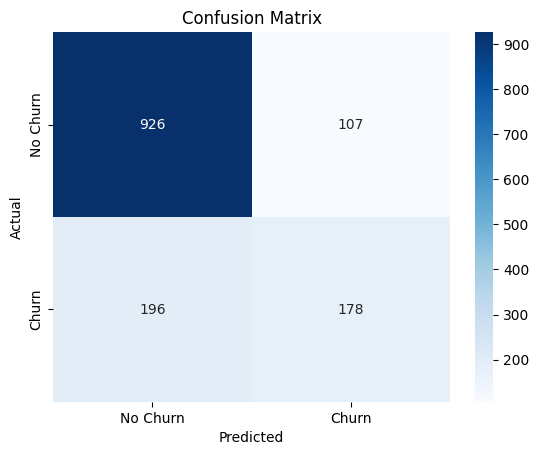

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

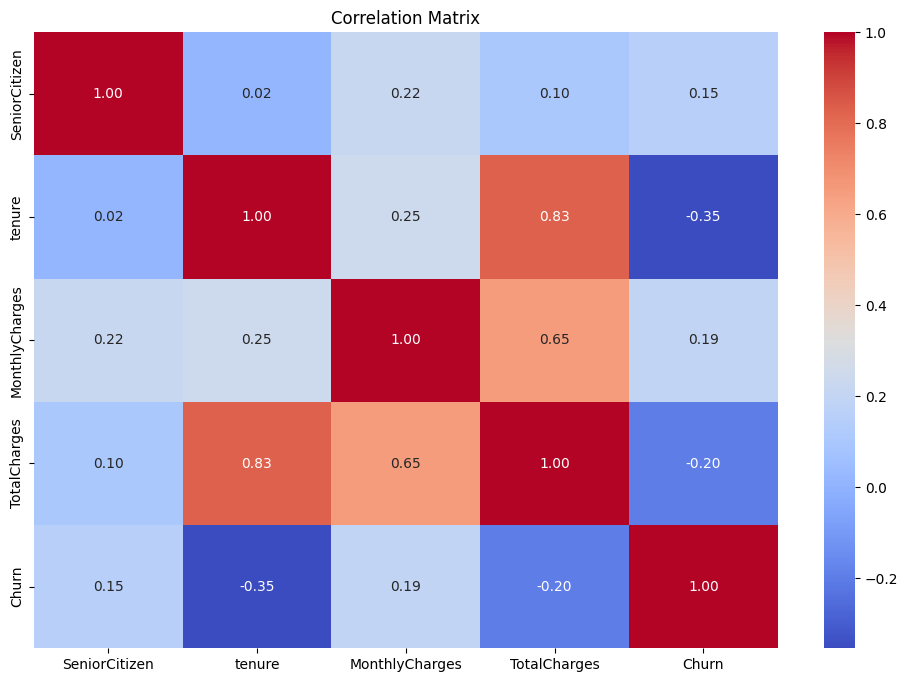

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

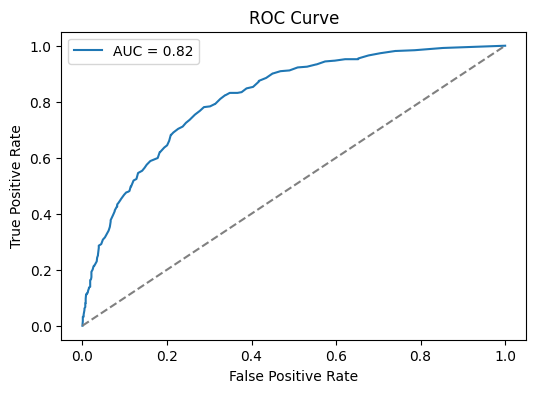

In [20]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()